<div style="background-color:green; border : 3px solid black; border-radius : 19px;margin : 1% ; padding : 3%;text-align : center;font-size : 3em;font-weight : bold;">
    Algorithme de Brelaz
</div>
<div style="text-align : center;">Par Kevin et Frédéric du groupe Phoenix</div>


<p>
Dans le cadre de la <strong>SAE202 : Exploration algorithmique d'un problème</strong>, nous avons dû réaliser un projet mathématique et informatique. Après concertation avec notre enseignant <em>Laila BAROUKH</em>, nous avons choisi de réaliser le projet <em>Algorithme de Brelaz</em>.
</p>

<p>
    Voici la description qui a été donnée : 
    <ul>
        <li><strong>Niveau de difficulté</strong> : &star;&star;</li>
        <li><strong>Description</strong> : Nous avons vu en cours un algorithme heuristique permettant d'estimer le nombre chromatique d'un graphe non orienté.</li>
        <li><strong>Animation</strong> : la coloration des différents sommets d'un graphe</li>
    </ul>
</p>

<p>L'un des objectifs du projet est, de réaliser au moins une animation. Pour cela, effectuons les différents TP sur la SAE(disponible en ligne <a href="https://www.ataraxy.info/COEUR/Modules/MethodesNumeriques/TP/Graphiques%20et%20animations-CORRECTION.html">ici</a>).</p>

<p>
Nous prévoyons de travailler environ 20h sur ce projet comme le temps estimé sur le mail
    <ul>
        <li>Kevin=<br> Programmation de Brelaz <br> Coloriage <br> Compatibilité des programmes <br> PyPlot <br> etc ... 
        </li>
        <li>Frédéric=<br> Redaction du rapport <br> Animation <br> Test Unitaire <br> Le Tri <br> etc ... 
        </li>
    </ul>
Malgré cette division, nous avons participé collégialement à l'intégralité du projet et échanger chacun avec l'autre au travers plusieurs appels discord pour pouvoir avancer sur ce travail
</p>

<p>
Finalement, le projet nous pris environ 35h pour réaliser le projet.
</p>

<ul><strong>Explication l'algorithme de Brelaz :</strong><br><br>
On considère un graphe <strong>G=(V,E)</strong> simple connexe et non orienté. Pour chaque sommet <strong>v</strong> de <strong>V</strong>, on calcule le degré de saturation <strong>DSAT(v)</strong> et l'on utilisera ce nombre ainsi que le degré des sommets pour <strong>déterminer l'ordre de coloration du graphe.</strong> L'algorithme s'arrête lorsque tous les sommets de G sont colorés.

L'algorithme <strong>DSATUR</strong> est un algorithme de <strong>coloration séquentiel</strong>, au sens où il colore un seul sommet non déjà coloré à la fois et tel qu'au départ <strong>le graphe n'est pas coloré.</strong> 
L'algorithme de Brelaz ne donne pas le nombre. 
</ul>



<p>Voici les bibliothèques dont nous aurons besoin pour l'exécution des programmes proposés.</p>

In [ ]:
#Fonction math
from math import *
import re

#Fonction aléatoire
from random import *

#Fonction de graphique et d'animation
from matplotlib import animation
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

<div style="background-color:red; border : 3px solid black; border-radius : 19px;margin : 1% ; padding : 3%;text-align : center;font-size : 3em;font-weight : bold;">
    Algorithme de Brelaz
</div>

<pre>1. Initialisation

    Pour chaque sommet x
    DSAT[x] = degré de x
    Fin pour

2. Itérations

  Tant que il existe des sommets non coloriés
    Pour chaque sommet x non colorié
      Si aucun voisin de x n'est colorié
        DSAT(x) = degré de x = nombre de voisin de x.
      sinon
        DSAT(x) = nombre de sommet adjacent de x qui sont coloriés.
      Fin si
    Fin pour

    On choisit un sommet x non colorié tel que DSAT(x) soit le plus grand.
    Si il y a conflit, on choisit le sommet qui a en plus le degré maximal.

    On colorie le sommet avec la plus petite couleur possible.

  Fin tant que
</pre>

Le premier dictionnaire nous donne quel point est relié avec qui est le deuxième dictionnaire est une matrice des points reliés entre eux

Par exemple :<br>
La première ligne : g["a"] = [0,1,1,0,0,0,0,0] <br>
Signifie que le point "a" est relié au point à la position numéro 1 et 2 qui sont respectivement b et c

Qu'est-ce qu'une matrice?<br>

Une matrice m×n est un tableau de nombres à m lignes et n colonnes. Les nombres qui composent la matrice sont appelés les éléments de la matrice (ou aussi les coefficients). Une matrice à m lignes et n colonnes est dite matrice d’ordre (m, n) ou de dimension m × n. L’ensemble des matrices à m lignes et n colonnes à coefficients réels se note Mm,n(<).

In [ ]:
gra = dict()
gra['a'] = ['b','c']
gra['b'] = ['a','d','e']
gra['c'] = ['a','d']
gra['d'] = ['b','c','e']
gra['e'] = ['b','d','f','g']
gra['f'] = ['e','g']
gra['g'] = ['e','f','h']
gra['h'] = ['g']
#ici on créer un graphe(sagitale) 

#ou encore matricielle
g = dict()
g["a"] = [0,1,1,0,0,0,0,0]
g["b"] = [1,0,0,1,1,0,0,0]
g["c"] = [1,0,0,1,0,0,0,0]
g["d"] = [0,1,1,0,1,0,0,0]
g["e"] = [0,1,0,1,0,1,1,0]
g["f"] = [0,0,0,0,1,0,1,0]
g["g"] = [0,0,0,0,1,1,0,1]
g["h"] = [0,0,0,0,0,0,1,0]


Qu'est ce qu'une <strong>liste adjacente</strong>

En algorithmique, une liste d'adjacence est une structure de données utilisée pour représenter un graphe. 

La <strong>liste d'adjacence</strong> d'un graphe non orienté, est la liste des voisins de chaque sommet1. Celle d'un graphe orienté est typiquement, pour chaque sommet, la liste de nœuds à la tête de chaque arête ayant le sommet comme queue.

C'est une représentation relativement compacte lorsqu'il y a peu d'arêtes (graphe creux), puisque la liste globale contient 2m éléments, où m est le nombre d'arêtes.

In [ ]:
# liste adjacente
def Liste_Adj(g):
    t = []
    for i in g:
      t2 = []
      for j in range(len(g[i])):
        if g[i][j] == 1:
          t2.append(j)
      t.append(t2)
    return t

In [ ]:
#test liste adjacente à partir du dictionnaire g et g étant le dictionnaire du graphe sous forme matricielle
print(Liste_Adj(g))

[[1, 2], [0, 3, 4], [0, 3], [1, 2, 4], [1, 3, 5, 6], [4, 6], [4, 5, 7], [6]]


<div style="background-color:red; border : 3px solid black; border-radius : 19px;margin : 1% ; padding : 3%;text-align : center;font-size : 3em;font-weight : bold;">
    Tracer des point dans un repère
</div>

Juste en bas, nous avons généré des positions aléatoire de point via la fonction "position_Aleatoire" pour ensuite pouvoir le schématisé dans un graphe.

Nous n'allons pas utiliser cette fonction pour le projet, car les Schéma créer à partir de cette fonction n'était pas très compréhensible.

In [ ]:
#génére des positions aléatoire de point 
def position_Aleatoire():
  return [randint(0,30),randint(0,30)]



La Fonction si dessous permet de créer 15 coordonné de point aléatoire


In [ ]:
#génére des coordonnées aléatoire de point 
for i in range(15):
  print(position_Aleatoire())


[7, 3]
[10, 29]
[10, 2]
[6, 3]
[30, 25]
[4, 24]
[28, 4]
[29, 11]
[30, 26]
[14, 20]
[26, 11]
[20, 0]
[21, 15]
[18, 15]
[25, 7]


La Fonction ci-dessous "Placement_Alea" permet d'afficher un graphe via les fonctions précédentes et pyplot

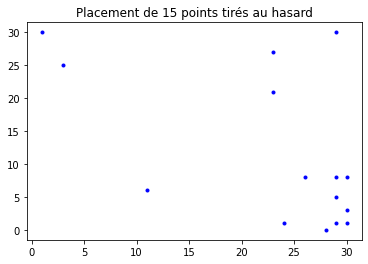

In [ ]:
#test d'affichage de point aléatoire
def Placement_Alea():
    for i in range(15) : 
        P = position_Aleatoire()
        plot(P[0], P[1], 'b.', lw=1)

    #Titre du graphique
    title("Placement de 15 points tirés au hasard")

    #Affichage
    show()

Placement_Alea()

Nous avons ensuite tester de tracer des intersection via pyplot que vous pouvait voir ci-dessous

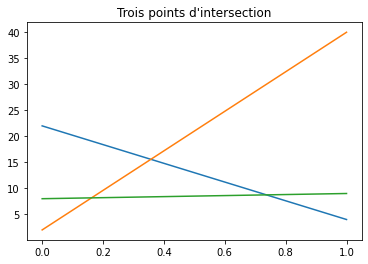

In [ ]:
# comment tracer des droite en python
xa = [0,1]
ya = [22, 4]
yb = [2, 40]
yc = [8, 9]
title("Trois points d'intersection")
plot(xa,ya)
plot(xa,yb)
plot(xa,yc)
show()

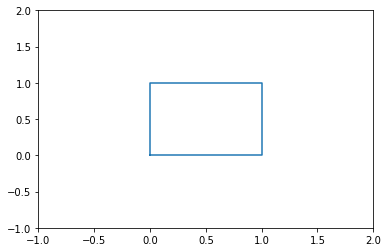

In [ ]:
#exemple de création possible avec Pyplot (un rectangle)
x = np.array([0,1,1, 0, 0])
y = np.array([0, 0, 1, 1, 0])
plt.plot(x, y)
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.show()

Utilisation de ASCII pour générer des lettres des A à H

In [ ]:
etiquettes = [chr(ord('A') + i) for i in range(8)]#générateur de lettre de A a I ici I = 8

Nous avons créé les coordonnées de chaque point manuellement pour pouvoir créer un graphe lisible est compréhensible 

In [ ]:
coord = [(0, 2), (0, 3), (1, 2), (2, 3), (2, 4), (4, 4), (3, 1), 
                        (1, 0)]#ce sont les coordonnées de chaque point dans l'ordre alphabétique 

In [ ]:
list_adj = Liste_Adj(g)#g ici correspond au graphe(dictionnaire) généré plus haut

<div style="background-color:red; border : 3px solid black; border-radius : 19px;margin : 1% ; padding : 3%;text-align : center;font-size : 3em;font-weight : bold;">
    Distance euclidienne
</div>

**Distance euclidienne**


En mathématiques , la distance euclidienne entre deux points dans l' espace euclidien est la longueur d'un segment de ligne entre les deux points. Elle peut être calculée à partir des coordonnées cartésiennes des points en utilisant le théorème de Pythagore , donc parfois appelée distance de Pythagore . Ces noms proviennent des anciens mathématiciens grecs Euclide et Pythagore , bien qu'Euclide ne représente pas les distances sous forme de nombres, et le lien entre le théorème de Pythagore et le calcul de la distance n'a été fait qu'au XVIIIe siècle. <br><br>

La distance entre deux objets qui ne sont pas des points est généralement définie comme étant la plus petite distance entre les paires de points des deux objets. Les formules sont connues pour calculer les distances entre différents types d'objets, comme la distance entre un point et une ligne . En mathématiques avancées, le concept de distance a été généralisé aux espaces métriques abstraits , et d'autres distances qu'euclidiennes ont été étudiées. Dans certaines applications de statistiques et d'optimisation, le carré de la distance euclidienne est utilisé à la place de la distance elle-même.
<br><br>

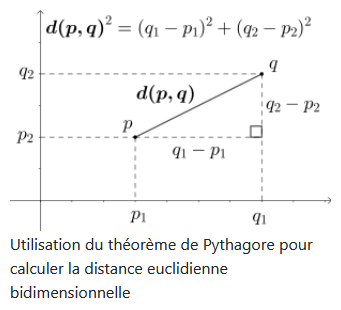

In [ ]:
#distance euclidienne
def dist_eucli(cA,cB):
  if len(cA) != 2 or len(cB) != 2 :
    return False
  return sqrt(abs((cA[0]-cB[0])^2+(cA[1]-cB[1])^2))

In [ ]:
#test de distance euclidienne
print("la distance euclidienne entre [45,8] et [15,9] est :",dist_eucli([45,8],[15,9]))

la distance euclidienne entre [45,8] et [15,9] est : 5.385164807134504


<div style="background-color:red; border : 3px solid black; border-radius : 19px;margin : 1% ; padding : 3%;text-align : center;font-size : 3em;font-weight : bold;">
    Graphe
</div>

Qu'est ce qu'un <strong>Graphe</strong>?

On appelle graphe la donnée d'un ensemble de points appelés sommets et d'un ensemble de lignes appelées arêtes qui relient certains sommets entre eux.
Le nombre de sommets d'un graphe s'appelle l'ordre du graphe. Deux sommets reliés entre eux par une arête sont dits adjacents.

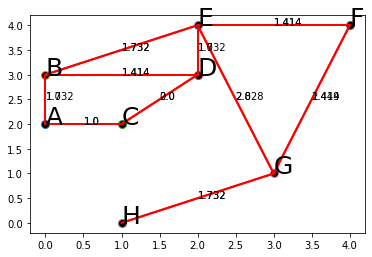

In [ ]:
#Génération du graphe de base 
def creation_graphe():
    for i in range(len(coord)):
        plt.text(coord[i][0],coord[i][1], etiquettes[i], size=25)
        plt.plot(coord[i][0],coord[i][1],  marker = 'o', markerfacecolor = 'black', markersize = 8)
        for j in list_adj[i] :
            plt.plot([coord[i][0],coord[j][0]], [coord[i][1],coord[j][1]], 'r-', lw=2) 
            plt.text((coord[i][0]+coord[j][0])/2, (coord[i][1]+coord[j][1])/2, round(dist_eucli(coord[i],coord[j]),3), size=10)
    #affichage
    plt.show()

creation_graphe()

Le <strong>degré</strong> d'un sommet est le nombre d'arêtes issues de ce sommet. La première fonction degre nous donne un dictionnaire avec chaque point et son degré

In [ ]:
#return un dictinnaire contenant les point et leur degré
def degre(liste):
    if len(liste) > 26:
        lettre = []
        for i in range(26):
            for j in range(10):
              lettre.append(chr(ord('A') + i)+str(j))
    else :
        lettre = [chr(ord('A') + i) for i in range(len(liste))]
    tab = dict()
    for i in range(len(liste)):
      tab[lettre[i]]=len(liste[i])
    return tab
#ici on utilisera degre pour la suite 

In [ ]:
#test de la fonction degre
print(degre(list_adj))
res = degre(list_adj)

{'A': 2, 'B': 3, 'C': 2, 'D': 3, 'E': 4, 'F': 2, 'G': 3, 'H': 1}


<div style="background-color:red; border : 3px solid black; border-radius : 19px;margin : 1% ; padding : 3%;text-align : center;font-size : 3em;font-weight : bold;">
    Algoithme de tri et degré
</div>

La deuxième fonction degré nous donne une liste de degrés de chaque point

Par exemple, ici, l'indice 5 (donc la 6éme valeur, car on commence à 0) a 2 degrés et l'indice 5 représente le point F

In [ ]:
#donne le degre de chaque point
def degre2(liste):
    tab = []
    for i in liste:
      tab.append(len(i))
    return tab


In [ ]:
#test de la fonction degre2
print(degre2(list_adj))

[2, 3, 2, 3, 4, 2, 3, 1]


<Strong>Qu'est ce qu'un algorithme de tri ?</Strong> <br>

Un algorithme de tri est, en informatique ou en mathématiques, un algorithme qui permet d'organiser une collection d'objets selon une relation d'ordre déterminée. Les objets à trier sont des éléments d'un ensemble muni d'un ordre total. Il est par exemple fréquent de trier des entiers selon la relation d'ordre usuelle « est inférieur ou égal à »
<br><br>

Dans le cas ci-dessous Nous utilisons le <Strong>Tri par insertion</Strong><br>

Le tri par insertion considère chaque élément du tableau et l'insère à la bonne place parmi les éléments déjà triés. Ainsi, au moment où on considère un élément, les éléments qui le précèdent sont déjà triés, tandis que les éléments qui le suivent ne sont pas encore triés.

Pour trouver la place où insérer un élément parmi les précédents, il faut le comparer à ces derniers, et les décaler afin de libérer une place où effectuer l'insertion.

L'algorithme a la particularité d'être online, c'est-à-dire qu'il peut recevoir la liste à trier élément par élément sans perdre en efficacité. 

In [ ]:
#tri une liste par insertion deux liste dans l'odre croissant
def tri_insertion(list1,list2):
    for i in range(len(list1)-1):
      k = i+1 # indice de la cle
      cle=list1[k]
      cle2=list2[k]
      while cle<list1[k-1] and k>0:
          list1[k] = list1[k -1]
          list2[k] = list2[k -1]
          k-=1
      list1[k]=cle
      list2[k]=cle2
    return list1,list2

In [ ]:
#test la fonction tri_insertion
print(tri_insertion([2, 3, 2, 3, 4, 2, 3, 1],["a","b","c","d","e","f","g","h"]))

([1, 2, 2, 2, 3, 3, 3, 4], ['h', 'a', 'c', 'f', 'b', 'd', 'g', 'e'])




Nous retrouvons ci-dessous un tri par insertion personnalisé permettant de donner 2 tableaux différent via un dictionnaire de sommet avec leur degré permettant de les ranger dans l'ordre décroissant donné sous forme de deux tableaux un de sommet et l'autre de degré.


In [ ]:
#tri un dictionnaire selon leur degre dans l'odre décroissant
def tri(dico):
    tab1,tab2 =[],[]
    for i in dico:
        tab1.append(i)
        tab2.append(dico[i])
    tab2,tab1 = tri_insertion(tab2,tab1)
    tab1 = list(reversed(tab1))
    tab2 = list(reversed(tab2))
    return tab1,tab2

In [ ]:
#test la fonction tri
l1,l2 = tri(res)
print("point tier dans l'odre :",l1," et leur degré :",l2)


point tier dans l'odre : ['E', 'G', 'D', 'B', 'F', 'C', 'A', 'H']  et leur degré : [4, 3, 3, 3, 2, 2, 2, 1]


<div style="background-color:red; border : 3px solid black; border-radius : 19px;margin : 1% ; padding : 3%;text-align : center;font-size : 3em;font-weight : bold;">
    Brelaz
</div>

Le but de Brelaz est de colorier un graphe sauf que le problème du coloriage de graphe consiste à assigner à chaque sommet une couleur, de façon à ce que deux sommets adjacents soient de couleurs différentes. <br>

La fonction ci-dessous nous permet d'avoir le résultat de la fonction tri (juste ci-dessus) sous forme de l'algorithme de Brelaz attention seulement l'initialisation en soit la représentation du Brelaz et non le résultat final

In [ ]:
#affichage de la première étape de brelaz
def affichage_init(lis1,lis2):
    tab = str(lis1)
    tab = tab[1:len(tab)-1]
    tab = tab.replace(","," | ")
    tab = tab.replace("'","")
    print(" Som(G) |",tab)
    print("-"*(len(tab)+9))
    tab2 = str(lis2)
    tab2 = tab2[1:len(tab2)-1]
    tab2 = tab2.replace(","," | ")
    print("d(x, G) |",tab2)
    


In [ ]:
#test de la fonction affichage_init
affichage_init(l1,l2)

 Som(G) | E |  G |  D |  B |  F |  C |  A |  H
---------------------------------------------
d(x, G) | 4 |  3 |  3 |  3 |  2 |  2 |  2 |  1


L'algorithme de Brélaz ou DSATUR permet de colorier un graphe et de donner une bonne borne supérieur du nombre chromatique. On considère que les couleurs sont numérotées : 1, 2, 3, 4, ... Voici les étapes de l'algorithme

Brelaz_V1 étants l'étape après l'initialisation, c'est la fonction permettant de produire Brelaz

In [ ]:
#brelaz V1
def Brelaz_V1(sommet,sNonC):
    couleur = ['AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ', 'BA', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'CA', 'CB', 'CC', 'CD', 'CE', 'CF', 'CG', 'CH', 'CI', 'CJ', 'DA', 'DB', 'DC', 'DD', 'DE', 'DF', 'DG', 'DH', 'DI', 'DJ', 'EA', 'EB', 'EC', 'ED', 'EE', 'EF', 'EG', 'EH', 'EI', 'EJ', 'FA', 'FB', 'FC', 'FD', 'FE', 'FF', 'FG', 'FH', 'FI', 'FJ', 'GA', 'GB', 'GC', 'GD', 'GE', 'GF', 'GG', 'GH', 'GI', 'GJ', 'HA', 'HB', 'HC', 'HD', 'HE', 'HF', 'HG', 'HH', 'HI', 'HJ', 'IA', 'IB', 'IC', 'ID', 'IE', 'IF', 'IG']#couleur en anglais
    DSAT = {}#nombre de sommet par sommet
    i=0
    coloration = {}#resultat finale
    while sNonC != []: #liste des sommet non coloriré
        for som in sNonC:
            voisin = sommet[sNonC[i]]#voisins
            aucun = True
            sColo = 0
            for s in voisin:#compte le nombre voisins colorié
                if s not in sNonC:
                    aucun = False
                    sColo += 1
            if aucun:
                DSAT[sNonC[i]] = len(voisin)
            else:
                DSAT[sNonC[i]] = sColo
            coloration[sNonC[i]] = couleur[sColo]
            i+=1
            
        color = coloration.keys()  
        m = 0
        maxiSommet = ""
        for som in sNonC:
            if DSAT[som] > m:
                m = DSAT[som]
                maxiSommet = som
        c = 1
        lis = []
        for voisin in sommet[maxiSommet]:        
            l = [coloration[voisin]]
            if l not in couleur:
                lis.append(l[0])
        while c in lis:
            c+=1
        coloration[maxiSommet] = c
        del sNonC[sNonC.index(maxiSommet)] #sommet non colorié
        i = 0
    return coloration


Ci-dessous nous cherchons a tester la fonction Brelaz_V1

nous avons utiliser en parametre gra un dictionnaire (voir partie Matrice en haut) et sNonC une liste des sommet non coloriré ci-dessus ce qui nous permet d'avoir un dictionnaire avec en key un sommet et en value l'indice de la couleur.

l'indice de couleur étant = <br>
couleur = ["purple","green","yellow","red","blue","orange"]

Nous pouvons donc affirmer que X(G)⩽3 . En fait X(G)=3 . En effet K3⊂G donc 3=X(K3)⩽X(G)⩽3 et ces inégalités sont des égalités.

In [ ]:
#test de la fonction de Brelaz_V1
l1 = ''.join(l1)
l1 = l1.lower()
sNonC = list(l1)

dicoColo = Brelaz_V1(gra,sNonC)
print(dicoColo)#gra est le premier dictionnaire que l'on a créé au début 

#ici on voit que la couleur max est 3 donc explication de brelaz.....

{'e': 1, 'g': 2, 'd': 2, 'b': 3, 'f': 3, 'c': 1, 'a': 2, 'h': 1}


Applique les couleurs au résultat de Brelaz

Du coup dans notre cas l'indice 0 étant E est colorier en vert puis l'indice 1 étant G étant en jaune

In [ ]:
def ColoGraphe(dicoColo):
        couleur = ["purple","green","yellow","red","blue","orange"]
        colo = dicoColo.values()
        i = 0
        tabCoul = []
        for val in colo:
          tabCoul.append(couleur[val])
          i += 1
        return tabCoul

In [ ]:
#test de la fonction ColoGraphe
print(ColoGraphe(dicoColo))

['green', 'yellow', 'yellow', 'red', 'red', 'green', 'yellow', 'green']


Brelaz_V2 donne un tableau visuel et compréhensif comparé a Brelaz_V1 qui fait l'algorithme sans l'afficher visuellement.

In [ ]:
#Brelaz V2
def Brelaz_V2(sommet,sNonc):
    tabBrelaz = []
    couleur = ['AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ', 'BA', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'CA', 'CB', 'CC', 'CD', 'CE', 'CF', 'CG', 'CH', 'CI', 'CJ', 'DA', 'DB', 'DC', 'DD', 'DE', 'DF', 'DG', 'DH', 'DI', 'DJ', 'EA', 'EB', 'EC', 'ED', 'EE', 'EF', 'EG', 'EH', 'EI', 'EJ', 'FA', 'FB', 'FC', 'FD', 'FE', 'FF', 'FG', 'FH', 'FI', 'FJ', 'GA', 'GB', 'GC', 'GD', 'GE', 'GF', 'GG', 'GH', 'GI', 'GJ', 'HA', 'HB', 'HC', 'HD', 'HE', 'HF', 'HG', 'HH', 'HI', 'HJ', 'IA', 'IB', 'IC', 'ID', 'IE', 'IF', 'IG']#couleur en anglais
    #couleur correspond à des couleurs inventées
    DSAT = {}#nombre de sommet par sommet
    i=0
    coloration = {}#resultat finale
    while sNonC != []: #liste des sommet non coloriré
        for som in sNonC:
            voisin = sommet[sNonC[i]]#voisins
            aucun = True
            sColo = 0
            for s in voisin:#compte le nombre voisins colorié
                if s not in sNonC:
                    aucun = False
                    sColo += 1
            if aucun:
                DSAT[sNonC[i]] = len(voisin)
            else:
                DSAT[sNonC[i]] = sColo
            coloration[sNonC[i]] = couleur[sColo]
            i+=1
        color = coloration.keys()  
        m = 0
        maxiSommet = ""
        for som in sNonC:
            if DSAT[som] > m:
                m = DSAT[som]
                maxiSommet = som
        c = 1
        lis = []
        for voisin in sommet[maxiSommet]:
            l = [coloration[voisin]]
            if l not in couleur:
                lis.append(l[0])
        while c in lis:
            c+=1
        coloration[maxiSommet] = c
        #######################################################
        tabBr = []
        for val in DSAT:
            if val in sNonC:
                tabBr.append(DSAT[val])
            else :
                tabBr.append("x")
        tabBrelaz.append(tabBr)
        #######################################################
        del sNonC[sNonC.index(maxiSommet)] #sommet non colorié
        i = 0
    return coloration,tabBrelaz


Étape du tableau = <br><br>

1- Il y a autant de ligne que le sommet. La ligne DSAT(x)1 correspond aux degrés puisqu'aucun sommet n'est colorié. On choisi donc toujours le sommet non colorié avec le plus grand DSAT et le plus à gauche (en cas d'égalité). <br><br>
Le premier sommet à être colorié est E .

On lui attribue la plus petite couleur possible et on recalcule DSAT(x) (dans la ligne DSAT(x) 2 ) pour chaque sommet x non colorié <br>

2- Deux sommets ont un DSAT maximal. On choisi alors celui qui est le plus à gauche dans le tableau. Il s'agit donc du sommet C . On le colorie avec la couleur 1 également puisque cela est possible. On complète le tableau
<br><br>

3- viens ensuite le sommet D qui est adjacent à E et à C ; il faut donc le colorier avec la couleur 2 car E et C étant déjà coloriés en 1 D ne pourra être de couleur 1.<br><br>

4- Viens ensuite le sommet B qui est adjacent à E et à D ; il faut donc le colorier avec la couleur 3 car E étant déjà coloriés en 1 et D en 2 donc D sera obligatoirement supérieur à 2.<br><br>

5- Viens ensuite le sommet A qui est adjacent à B et à C ; il faut donc le colorier avec la couleur 2 car B étant déjà coloriés en 3 et C déjà coloriés en 1.<br><br>

6- Viens ensuite le sommet G qui est adjacent à H, à F et à E ; il faut donc le colorier avec la couleur 2.<br><br>

7- Viens ensuite le sommet F qui est adjacent à E et à G, mais pas adjacent à B ; il faut donc le colorier avec la couleur 3.<br><br>

8- Viens ensuite le sommet H qui est adjacent à G, mais pas adjacent à c et à e ; il faut donc le colorier avec la couleur 1.<br><br>

In [ ]:
def affichage_brelaz(lis1,lis2,lis3,lis4):
    tab = str(lis1)
    tab = tab[1:len(tab)-1]
    tab = tab.replace(","," | ")
    tab = tab.replace("'","")
    print(" Som(G) |",tab)
    print("-"*(len(tab)+9))
    i = 1
    for val in lis3:
        tab2 = str(val)
        tab2 = tab2[1:len(tab2)-1]
        tab2 = tab2.replace(","," | ")
        tab2 = tab2.replace("'","")
        n = len(tab)
        current = 0
        color = 0
        for j in range(len(tab2)):
            if tab2[current] in '123456':
               color += 1
            if tab2[current] == "x":
               tab2 = tab2[:current]+ colorise("x",lis4[color]-1)+tab2[current+1:]
               color += 1
               current += 18
            current += 1
               
        print("DSAT",i," |",tab2)
        print("-"*(n+9))
        i += 1
    tab = str(lis4)
    tab = tab[1:len(tab)-1]
    tab = tab.replace(","," | ")
    tab = tab.replace("'","")
    print(" Coul   |",tab)

Nous avons ensuite trouvé un moyen de colorier un String en python, nous avons testé le programme sur un texte aléatoirement en changeant les couleurs entre chaque mot.

In [ ]:
#Coloration d'un texte + exemple
class color:
    g = '\033[92m' # vert
    y = '\033[93m' # jaune
    r = '\033[91m' # rouge 
    n = '\033[95m' # rose
    b = '\033[94m' # bleu
    
lipsum = 'L orem ipsum dolor sit amet, consectetuer adipiscing elit. Ut purus elit, vestibulum ut, placerat ac, adipiscing vitae, felis. Curabitur dictum gravida mauris. Nam arcu libero, nonummy eget, consectetuer id, vulputate a, magna. Donec vehicula augue eu neque. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Mauris ut leo. Cras viverra metus rhoncus sem. Nulla et lectus vestibulum urna fringilla ultrices. Phasellus eu tellus sit amet tortor gravida placerat. Integer sapien est, iaculis in, pretium quis, viverra ac, nunc. Praesent eget sem vel leo ultrices bibendum. Aenean faucibus. Morbi dolor nulla, malesuada eu, pulvinar at, mollis ac, nulla. Curabitur auctor semper nulla. Donec varius orci eget risus. Duis nibh mi, congue eu, accumsan eleifend, sagittis quis, diam. Duis eget orci sit amet orci dignissim rutrum.'

couleurs = [ color.g , color.y , color.r , color.n , color.b ]
r = ''
i = 0
for c in lipsum:
    if c.upper() == c:
        r += couleurs[i] + c
        i = (i+1) % 5
    else:
        r += c   
print(r)
            


L orem ipsum dolor sit amet, consectetuer adipiscing elit. Ut purus elit, vestibulum ut, placerat ac, adipiscing vitae, felis. Curabitur dictum gravida mauris. Nam arcu libero, nonummy eget, consectetuer id, vulputate a, magna. Donec vehicula augue eu neque. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Mauris ut leo. Cras viverra metus rhoncus sem. Nulla et lectus vestibulum urna fringilla ultrices. Phasellus eu tellus sit amet tortor gravida placerat. Integer sapien est, iaculis in, pretium quis, viverra ac, nunc. Praesent eget sem vel leo ultrices bibendum. Aenean faucibus. Morbi dolor nulla, malesuada eu, pulvinar at, mollis ac, nulla. Curabitur auctor semper nulla. Donec varius orci eget risus. Duis nibh mi, congue eu, accumsan eleifend, sagittis quis, diam. Duis eget orci sit amet orci dignissim rutrum.


La fonction ci-dessous permet de colorier un seul élément d'une phrase l'élément en question étant "let" qui est en paramètre et le paramètre "num" étant l'indice de la couleur à mettre à l'élément.

On a décidé de créer cette fonction pour permettre de colorier les x du résultat de brelaz dans la couleur qui leur est dédié.

In [ ]:
#algorithme qui change la couleur d'un caractére(let) selon le numéro en paramatre (num)
def colorise(let,num):
    g = '\033[92m' # vert
    y = '\033[93m' # jaune
    r = '\033[91m' # rouge
    n = '\033[95m' # rose
    b = '\033[94m' # bleu
    couleurs = [ g , y , r , n , b ]
    return couleurs[num]+let+ "\033[38;2;0;0;0m"
            
print( colorise("x",3) )

x


In [ ]:
#test de la fonction affichage_brelaz
resultat = []
    
l1 = ''.join(l1)
l1 = l1.lower()
sNonC = list(l1) 
coloration, tabBrelaz = Brelaz_V2(gra,sNonC)

for i in coloration:
    resultat.append(coloration[i])
affichage_brelaz(['E', 'G', 'D', 'B', 'F', 'C', 'A', 'H'],[4, 3, 3, 3, 2, 2, 2, 1],tabBrelaz,resultat)

 Som(G) | E |  G |  D |  B |  F |  C |  A |  H
---------------------------------------------
DSAT 1  | 4 |  3 |  3 |  3 |  2 |  2 |  2 |  1
---------------------------------------------
DSAT 2  | x |  1 |  1 |  1 |  1 |  2 |  2 |  1
---------------------------------------------
DSAT 3  | x |  1 |  2 |  1 |  1 |  x |  1 |  1
---------------------------------------------
DSAT 4  | x |  1 |  x |  2 |  1 |  x |  1 |  1
---------------------------------------------
DSAT 5  | x |  1 |  x |  x |  1 |  x |  2 |  1
---------------------------------------------
DSAT 6  | x |  1 |  x |  x |  1 |  x |  x |  1
---------------------------------------------
DSAT 7  | x |  x |  x |  x |  2 |  x |  x |  1
---------------------------------------------
DSAT 8  | x |  x |  x |  x |  x |  x |  x |  1
---------------------------------------------
 Coul   | 1 |  2 |  2 |  3 |  3 |  1 |  2 |  1


<div style="background-color:red; border : 3px solid black; border-radius : 19px;margin : 1% ; padding : 3%;text-align : center;font-size : 3em;font-weight : bold;">
    Coloration du graphe
</div>

Après avoir fini la partie programmation de l'Algorithme de Brelaz

Nous avons donc du colorier le graphe initial de façon a ce que les résultats obtenus concorde avec le graphe

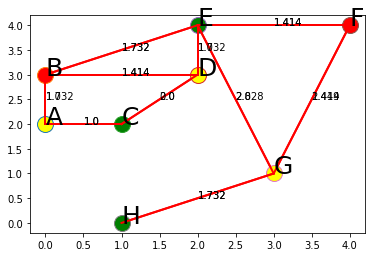

In [ ]:
#application de la coloration de brelaz
l1 = ''.join(l1)
l1 = l1.lower()
sNonC = list(l1) 
coloration2, tabBrelaz2 = Brelaz_V2(gra,sNonC)
tabCoul = ColoGraphe(coloration2)
dic = {'E':0, 'G':1, 'D':2, 'B':3, 'F':4, 'C':5, 'A':6, 'H':7}
def coloGraphe(tabCoul):
    for i in range(len(coord)):
        plt.text(coord[i][0],coord[i][1], etiquettes[i], size=25)
        plt.plot(coord[i][0],coord[i][1],  marker = 'o', markerfacecolor = tabCoul[dic[etiquettes[i]]], markersize = 16)
        for j in list_adj[i] :
            plt.plot([coord[i][0],coord[j][0]], [coord[i][1],coord[j][1]], 'r-', lw=2) 
            plt.text((coord[i][0]+coord[j][0])/2, (coord[i][1]+coord[j][1])/2, round(dist_eucli(coord[i],coord[j]),3), size=10)
    plt.show()
  
coloGraphe(tabCoul)

La fonction ci-dessous permet de récupérer frame par frame (étape par étape) la coloration du Brelaz

Cette fonction permet via les paramètres d'afficher tout les frame jusqu'à une certaine frame demander.

Dans notre cas, il y a 8 frame d'étape + la frame initial qui correspond au graphe de base ce qui fait 9 frame.

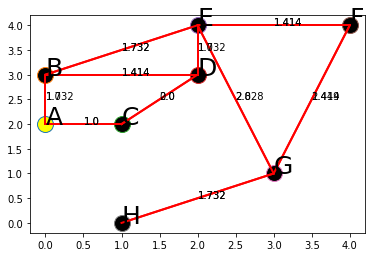

In [ ]:
#application de la coloration de brelaz Frame par Frame
l1 = ''.join(l1)
l1 = l1.lower()
sNonC = list(l1) 
coloration2, tabBrelaz2 = Brelaz_V2(gra,sNonC)
tabCoul = ColoGraphe(coloration2)

def coloGrapheFrame(tabCoul,n):
    dic = {'E':0, 'G':1, 'D':2, 'B':3, 'F':4, 'C':5, 'A':6, 'H':7}
    for i in range(len(coord)):
        plt.text(coord[i][0],coord[i][1], etiquettes[i], size=25)
        if i <= n:
            plt.plot(coord[i][0],coord[i][1],  marker = 'o', markerfacecolor = tabCoul[dic[etiquettes[i]]], markersize = 16)
        else :
            plt.plot(coord[i][0],coord[i][1],  marker = 'o', markerfacecolor = "black", markersize = 16)
        for j in list_adj[i] :
            plt.plot([coord[i][0],coord[j][0]], [coord[i][1],coord[j][1]], 'r-', lw=2) 
            plt.text((coord[i][0]+coord[j][0])/2, (coord[i][1]+coord[j][1])/2, round(dist_eucli(coord[i],coord[j]),3), size=10)
    plt.show()
  
coloGrapheFrame(tabCoul,0)

Pour finir suite à l'enregistrement de chaque frame, nous affichons une animation du résultat étape par étape de l'algorithme que vous trouverez ci-dessous.

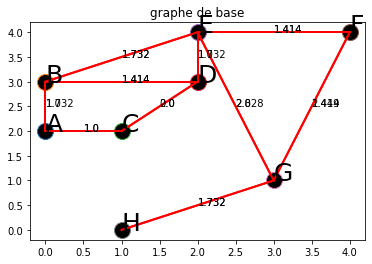

coloration du 0 éme point


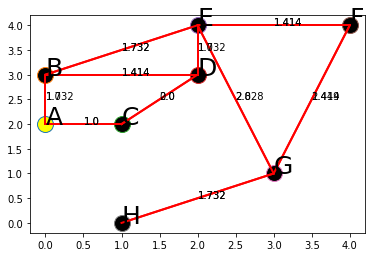

coloration du 1 éme point


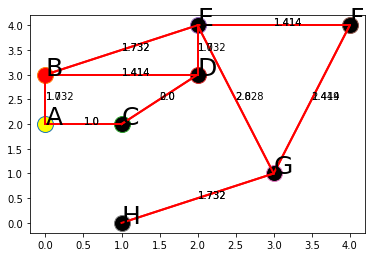

coloration du 2 éme point


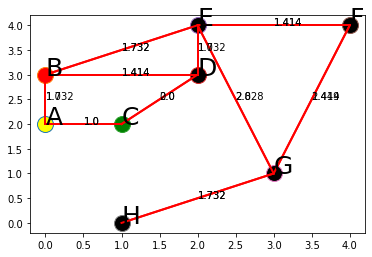

coloration du 3 éme point


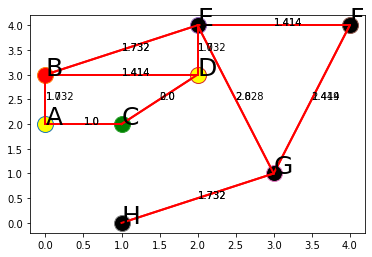

coloration du 4 éme point


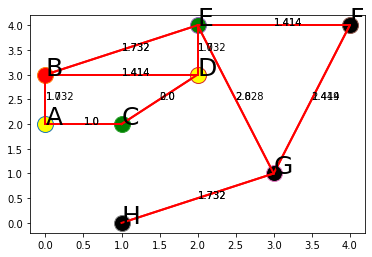

coloration du 5 éme point


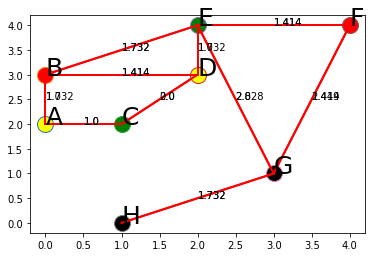

coloration du 6 éme point


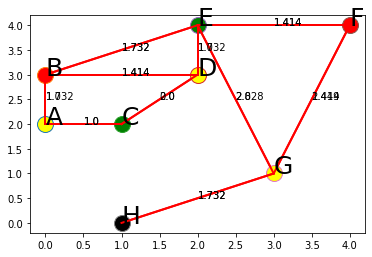

coloration du 7 éme point


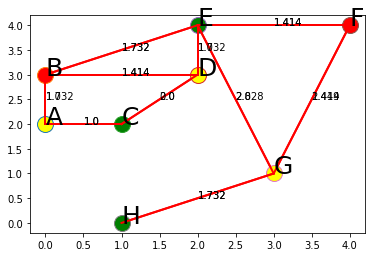

In [ ]:
title("graphe de base")
coloGrapheFrame(tabCoul,-1)
for i in range(len(tabCoul)):
    print("coloration du",i,"éme point")
    coloGrapheFrame(tabCoul,i)

<div style="background-color:red; border : 3px solid black; border-radius : 19px;margin : 1% ; padding : 3%;text-align : center;font-size : 3em;font-weight : bold;">
    Animation
</div>

Nous refaisons la même chose qu'au-dessus, mais maintenant nous allons à la place mettre un pourcentage permettant de savoir à combien de pourcent reste t'il avant de finir.

Nous sommes quand même navré, mais nous n'avons pas réussis a complètement réussie la partie animation nous avons réussis que partiellement avec une image étape par étape, mais non comme dans l'exemple avec une interface permettant d'avoir une animation

Calculs en cours : -11.11%           

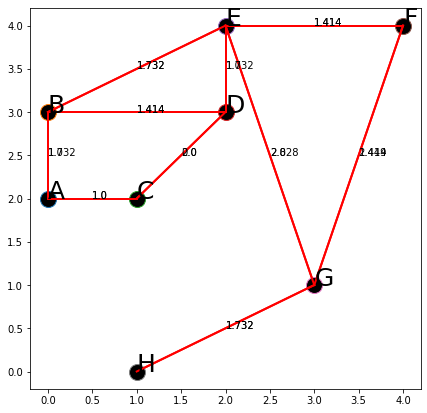

Calculs en cours : 0.0%           

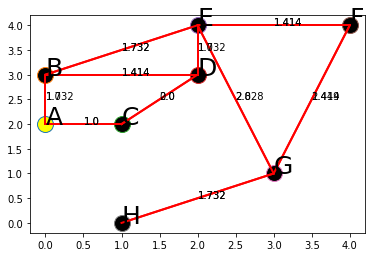

Calculs en cours : 11.11%           

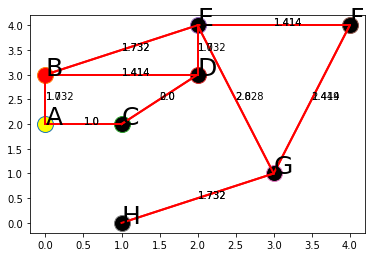

Calculs en cours : 22.22%           

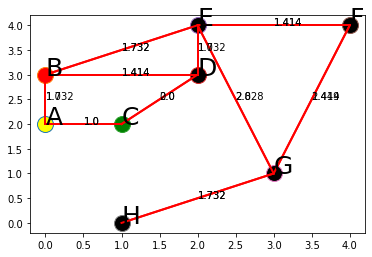

Calculs en cours : 33.33%           

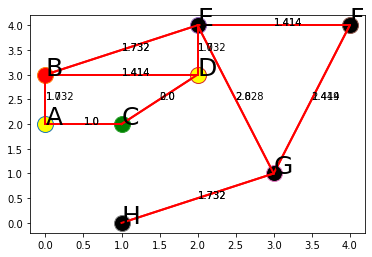

Calculs en cours : 44.44%           

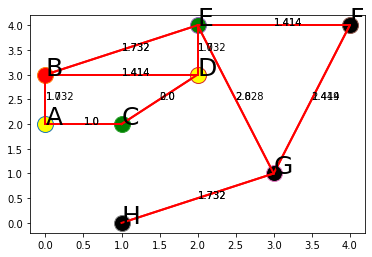

Calculs en cours : 55.56%           

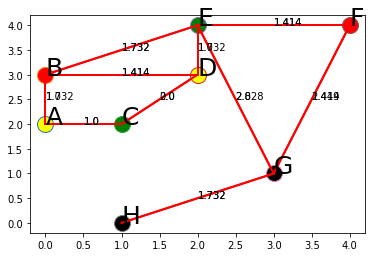

Calculs en cours : 66.67%           

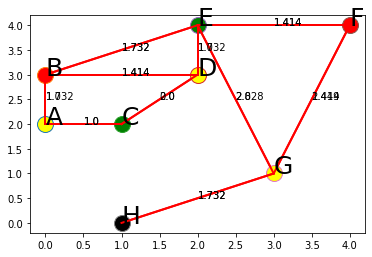

Calculs en cours : 77.78%           

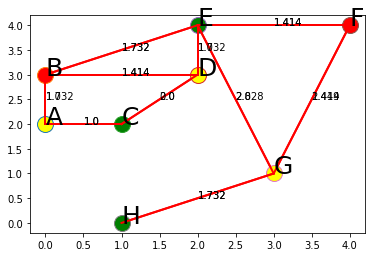

Calculs en cours : 88.89%           

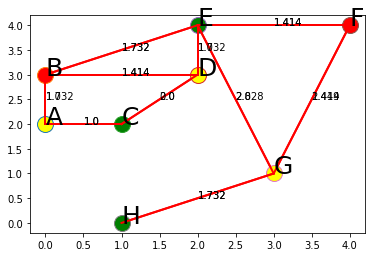

Calculs en cours : 100.0%           

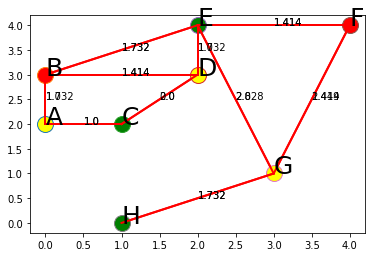

Le temps de calcul est de : 2.949296455999999 sec


In [ ]:
nb_frames = 9

l1 = ''.join(l1)
l1 = l1.lower()
sNonC = list(l1) 
coloration2, tabBrelaz2 = Brelaz_V2(gra,sNonC)
tabCoul = ColoGraphe(coloration2)
artist = []
fig = figure(figsize=(7,7))

#animation
def Mon_Animation(num_frame):
    print("\rCalculs en cours : "+str(round(num_frame/nb_frames*100, 2))+"%", "          ", end='')
    return coloGrapheFrame(tabCoul,num_frame)

frame = Mon_Animation(-1)
artist.append([frame])
start = time.process_time()
for imgNum in range(nb_frames+1):
    frame = Mon_Animation(imgNum)
    artist.append([frame])
print("Le temps de calcul est de :",time.process_time()-start,'sec')

In [ ]:
T = 2.4644392920000016 
print(f'Le temps d\' exécution est de {T//60//60}h {T//60%60}min {T%60}sec')

Le temps d' exécution est de 0.0h 0.0min 2.4644392920000016sec


<div style="background-color:red; border : 3px solid black; border-radius : 19px;margin : 1% ; padding : 3%;text-align : center;font-size : 3em;font-weight : bold;">
    L'agorithme de Brelaz avec 100 sommet 
</div>

La fonction GrapheRand permet de générer un graphe aléatoire de N sommet ayant pour valeur maximum valMax

Nous avons modifié quelque ligne du programme donné permettant de la rendre compatible avec le nôtre.

In [ ]:
#génére un graphe aléatoire
def GrapheRand(n, p=0.5, valMax=1) : 
    dico = dict()
    res=[]
    for i in range(n) : 
        res.append([])
        for j in range(n) : 
            res[i].append(0)
    lettre = []
    for i in range(26):
        for j in range(10):
          lettre.append(chr(ord('A') + i)+str(j))
    c = 0
    for i in range(n) : 
        for j in range(i+1, n) : 
            if(random()<p) :
                res[i][j]=randint(1, valMax)
                res[j][i]=res[i][j]
        dico[lettre[c]] = res[i]
        c += 1
    return dico

Le 1er graphe étants dictionnaire représentant une matrice <br>
Le 2eme graphe étants dictionnaire qui répertorie tous les voisins de chaque sommet

<img src="https://mobile.interieur.gouv.fr/var/miomcti/storage/images/media/lapolicenationalerecrute.fr/images/autre/attention-bleu/708094-1-fre-FR/attention-bleu.png" width="250">

À partir d'ici l'exemple sera très <strong>LONG</strong> (un Graphe à 100 sommets demandé par les soins de Monsieur Hebert)

In [ ]:
#creation des deux graphe Matrice et voisin avec 100 sommet aléatoire
GrapheM = GrapheRand(100)
print(GrapheM)
GrapheS = dict()
lettre = []
for i in range(26):
    for j in range(10):
      lettre.append(chr(ord('A') + i)+str(j))
      
for val in GrapheM:
    tab = []
    for j in range(len(GrapheM[val])):
        if GrapheM[val][j] == 1:
            tab.append(lettre[j])
    GrapheS[val] = tab
print(GrapheS,"\ n")

{'A0': [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0], 'A1': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1], 'A2': [1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1], 'A3': [1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,

In [ ]:
list_a = Liste_Adj(GrapheM)
print(list_a)

[[2, 3, 4, 5, 12, 15, 16, 19, 20, 21, 27, 31, 32, 34, 35, 36, 37, 39, 43, 44, 47, 50, 51, 52, 54, 55, 59, 60, 61, 64, 68, 71, 73, 75, 76, 78, 80, 81, 83, 86, 88, 89, 90, 91, 93, 95, 96], [6, 10, 12, 15, 16, 19, 23, 25, 27, 29, 31, 32, 35, 36, 38, 39, 42, 43, 44, 47, 48, 49, 51, 53, 54, 56, 59, 63, 65, 66, 71, 72, 73, 74, 76, 77, 78, 80, 82, 84, 85, 88, 90, 93, 94, 97, 98, 99], [0, 3, 4, 5, 6, 7, 8, 10, 13, 15, 16, 19, 23, 24, 25, 26, 32, 33, 34, 35, 38, 39, 40, 42, 44, 45, 46, 47, 48, 50, 52, 55, 56, 58, 59, 60, 61, 63, 67, 68, 69, 70, 71, 73, 76, 78, 79, 80, 81, 85, 86, 87, 91, 94, 97, 99], [0, 2, 4, 7, 8, 9, 11, 12, 14, 18, 19, 20, 21, 22, 24, 30, 32, 34, 36, 40, 41, 44, 46, 47, 48, 49, 52, 54, 55, 56, 58, 60, 62, 66, 67, 72, 73, 74, 77, 78, 79, 81, 82, 83, 84, 85, 88, 89, 96, 97, 98], [0, 2, 3, 6, 7, 9, 11, 12, 15, 16, 17, 18, 19, 22, 25, 26, 34, 35, 36, 38, 39, 43, 47, 48, 53, 54, 55, 57, 58, 65, 66, 67, 69, 70, 71, 72, 75, 76, 78, 79, 82, 87, 92, 94, 96, 98, 99], [0, 2, 6, 8, 10, 

In [ ]:
Graphe2 = degre(list_a)
print(Graphe2)

{'A0': 47, 'A1': 48, 'A2': 56, 'A3': 51, 'A4': 47, 'A5': 41, 'A6': 48, 'A7': 50, 'A8': 43, 'A9': 46, 'B0': 54, 'B1': 53, 'B2': 40, 'B3': 41, 'B4': 55, 'B5': 45, 'B6': 62, 'B7': 46, 'B8': 55, 'B9': 55, 'C0': 53, 'C1': 52, 'C2': 50, 'C3': 50, 'C4': 53, 'C5': 49, 'C6': 50, 'C7': 51, 'C8': 49, 'C9': 38, 'D0': 49, 'D1': 53, 'D2': 49, 'D3': 49, 'D4': 53, 'D5': 49, 'D6': 49, 'D7': 47, 'D8': 46, 'D9': 47, 'E0': 48, 'E1': 56, 'E2': 49, 'E3': 42, 'E4': 43, 'E5': 53, 'E6': 54, 'E7': 50, 'E8': 46, 'E9': 45, 'F0': 53, 'F1': 54, 'F2': 53, 'F3': 56, 'F4': 54, 'F5': 48, 'F6': 55, 'F7': 50, 'F8': 50, 'F9': 58, 'G0': 43, 'G1': 53, 'G2': 47, 'G3': 40, 'G4': 43, 'G5': 46, 'G6': 62, 'G7': 46, 'G8': 47, 'G9': 43, 'H0': 49, 'H1': 44, 'H2': 58, 'H3': 57, 'H4': 47, 'H5': 58, 'H6': 48, 'H7': 45, 'H8': 52, 'H9': 52, 'I0': 48, 'I1': 45, 'I2': 57, 'I3': 58, 'I4': 41, 'I5': 44, 'I6': 47, 'I7': 55, 'I8': 59, 'I9': 49, 'J0': 49, 'J1': 47, 'J2': 50, 'J3': 50, 'J4': 37, 'J5': 52, 'J6': 45, 'J7': 51, 'J8': 43, 'J9': 49}

In [ ]:
liste1,liste2 = tri(Graphe2)
print(liste1,liste2)

['G6', 'B6', 'I8', 'I3', 'H5', 'H2', 'F9', 'I2', 'H3', 'F3', 'E1', 'A2', 'I7', 'F6', 'B9', 'B8', 'B4', 'F4', 'F1', 'E6', 'B0', 'G1', 'F2', 'F0', 'E5', 'D4', 'D1', 'C4', 'C0', 'B1', 'J5', 'H9', 'H8', 'C1', 'J7', 'C7', 'A3', 'J3', 'J2', 'F8', 'F7', 'E7', 'C6', 'C3', 'C2', 'A7', 'J9', 'J0', 'I9', 'H0', 'E2', 'D6', 'D5', 'D3', 'D2', 'D0', 'C8', 'C5', 'I0', 'H6', 'F5', 'E0', 'A6', 'A1', 'J1', 'I6', 'H4', 'G8', 'G2', 'D9', 'D7', 'A4', 'A0', 'G7', 'G5', 'E8', 'D8', 'B7', 'A9', 'J6', 'I1', 'H7', 'E9', 'B5', 'I5', 'H1', 'J8', 'G9', 'G4', 'G0', 'E4', 'A8', 'E3', 'I4', 'B3', 'A5', 'G3', 'B2', 'C9', 'J4'] [62, 62, 59, 58, 58, 58, 58, 57, 57, 56, 56, 56, 55, 55, 55, 55, 55, 54, 54, 54, 54, 53, 53, 53, 53, 53, 53, 53, 53, 53, 52, 52, 52, 52, 51, 51, 51, 50, 50, 50, 50, 50, 50, 50, 50, 50, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 47, 47, 47, 47, 47, 46, 46, 46, 46, 46, 46, 45, 45, 45, 45, 45, 44, 44, 43, 43, 43, 43, 43, 43, 42, 41, 41, 41, 40, 40, 38, 37

In [ ]:
affichage_init(liste1,liste2)

 Som(G) | G6 |  B6 |  I8 |  I3 |  H5 |  H2 |  F9 |  I2 |  H3 |  F3 |  E1 |  A2 |  I7 |  F6 |  B9 |  B8 |  B4 |  F4 |  F1 |  E6 |  B0 |  G1 |  F2 |  F0 |  E5 |  D4 |  D1 |  C4 |  C0 |  B1 |  J5 |  H9 |  H8 |  C1 |  J7 |  C7 |  A3 |  J3 |  J2 |  F8 |  F7 |  E7 |  C6 |  C3 |  C2 |  A7 |  J9 |  J0 |  I9 |  H0 |  E2 |  D6 |  D5 |  D3 |  D2 |  D0 |  C8 |  C5 |  I0 |  H6 |  F5 |  E0 |  A6 |  A1 |  J1 |  I6 |  H4 |  G8 |  G2 |  D9 |  D7 |  A4 |  A0 |  G7 |  G5 |  E8 |  D8 |  B7 |  A9 |  J6 |  I1 |  H7 |  E9 |  B5 |  I5 |  H1 |  J8 |  G9 |  G4 |  G0 |  E4 |  A8 |  E3 |  I4 |  B3 |  A5 |  G3 |  B2 |  C9 |  J4
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bd/France_road_sign_AB4.svg/1200px-France_road_sign_AB4.svg.png" width="250">

<br><br><br>

Nous avons décidé de ne pas faire de graphe et le résultat de brelaz_V2, car il y avait beaucoup trop de valeur et que notre fonction couleur ne possède pas assez de couleur, car Python ne permet pas d'avoir plus de 15 couleurs.

In [ ]:
list_ad = Liste_Adj(GrapheM)
Graphe2 = degre(list_ad)
list1,list2 = tri(Graphe2)
lis = list1
brel = Brelaz_V1(GrapheS,lis)
print("le resultat de la coloration de Brelaz est :",brel)
max = 0

for i in brel:
    if brel[i]>max:
        max = brel[i]

print("Ici selon brelaz il faudra au maximum",max,"couleurs différentes")
#on a pas affiché brelaz_v2 car il n'existe pas assez de couleur en python pouvoir afficher le tableau

le resultat de la coloration de Brelaz est : {'G6': 1, 'B6': 7, 'I8': 4, 'I3': 1, 'H5': 4, 'H2': 1, 'F9': 2, 'I2': 12, 'H3': 8, 'F3': 7, 'E1': 10, 'A2': 1, 'I7': 14, 'F6': 5, 'B9': 4, 'B8': 4, 'B4': 6, 'F4': 16, 'F1': 11, 'E6': 6, 'B0': 10, 'G1': 9, 'F2': 2, 'F0': 11, 'E5': 5, 'D4': 3, 'D1': 9, 'C4': 3, 'C0': 8, 'B1': 2, 'J5': 7, 'H9': 9, 'H8': 9, 'C1': 2, 'J7': 3, 'C7': 1, 'A3': 7, 'J3': 2, 'J2': 3, 'F8': 10, 'F7': 13, 'E7': 4, 'C6': 13, 'C3': 5, 'C2': 8, 'A7': 13, 'J9': 17, 'J0': 19, 'I9': 15, 'H0': 6, 'E2': 3, 'D6': 14, 'D5': 14, 'D3': 11, 'D2': 15, 'D0': 17, 'C8': 16, 'C5': 6, 'I0': 12, 'H6': 5, 'F5': 9, 'E0': 5, 'A6': 12, 'A1': 20, 'J1': 12, 'I6': 8, 'H4': 12, 'G8': 5, 'G2': 14, 'D9': 13, 'D7': 15, 'A4': 18, 'A0': 6, 'G7': 8, 'G5': 17, 'E8': 11, 'D8': 15, 'B7': 19, 'A9': 6, 'J6': 14, 'I1': 18, 'H7': 18, 'E9': 14, 'B5': 7, 'I5': 3, 'H1': 16, 'J8': 2, 'G9': 10, 'G4': 18, 'G0': 20, 'E4': 17, 'A8': 11, 'E3': 3, 'I4': 15, 'B3': 21, 'A5': 16, 'G3': 6, 'B2': 21, 'C9': 7, 'J4': 7}
Ici sel

<h1><strong>Exercice SURPRISE MON GARS ✌</strong></h1>

Le grand schtroumpf pour le grand menage de printemps propose de repeindre les 100 maisons du village, il demande donc à 3 schtroumpf au hasard une idée
<br><br>

<img src="https://www.supersoluce.com/sites/default/files/logo1/le-village-schtroumpfs-vignette.jpg" width="300">

<br><br>

<dib> <img src="https://static.wikia.nocookie.net/schtroumpfs/images/e/e4/Schtroumpfette.jpg/revision/latest?cb=20130807165831&path-prefix=fr" width="100"> 
Schtroumpfette propose que toutes les maisons soient de la même couleur pour une question d'esthétique selon elle.
</div>

<br>

<div> <img src="https://static.wikia.nocookie.net/schtroumpfs/images/b/b7/Schtroumpf-a-lunettes_original_backup.jpg/revision/latest?cb=20150308152827&path-prefix=fr" width="100"> 
Schtroumpf à lunette propose que chaque maison adjacente ne soit pas de la même couleur pour permettre au village d'être plus coloré.
</div>

<br>

<div> <img src="https://static.wikia.nocookie.net/schtroumpfs/images/b/ba/Schtroumpf-grognon_original_backup.jpg/revision/latest?cb=20150222140755&path-prefix=fr" width="100"> 
Schtroumpf grognon propose 2 couleurs, car il n'apprécie pas la diversité couleur et ni l'uniformité.
</div>

<br>

Pour que le village soit mieux camoufler dans la forêt le grand Schtroumpf décide prendre l'idée de Schtroumpf à lunette.



On a donc 2 graphes du village dont une Sagittale et l'autre matricielle que vous trouverez ci-dessous.

Chaque est représenté par une adresse définie par une lettre + un nombre et chaque adresse est relier à un voisin défini par l'adresse

In [ ]:
GrapheMSchtroumpf = GrapheRand(100)
print(GrapheMSchtroumpf)
GrapheSSchtroumpf = dict()
lettre = []
for i in range(26):
    for j in range(10):
      lettre.append(chr(ord('A') + i)+str(j))
      
for val in GrapheMSchtroumpf:
    tab = []
    for j in range(len(GrapheMSchtroumpf[val])):
        if GrapheMSchtroumpf[val][j] == 1:
            tab.append(lettre[j])
    GrapheSSchtroumpf[val] = tab
print(GrapheSSchtroumpf)

{'A0': [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], 'A1': [1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0], 'A2': [0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], 'A3': [0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,

In [ ]:
print(GrapheSSchtroumpf)

{'A0': ['A1', 'A4', 'A5', 'A8', 'B0', 'B1', 'B2', 'B6', 'B7', 'B8', 'C0', 'C2', 'C5', 'D1', 'D3', 'D6', 'D7', 'D8', 'D9', 'E1', 'E3', 'E4', 'E9', 'F0', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'G0', 'G1', 'G2', 'G4', 'G5', 'G7', 'G9', 'H1', 'H2', 'H5', 'H6', 'H7', 'H8', 'I0', 'I2', 'I4', 'I5', 'I6', 'I8', 'J0', 'J2', 'J3'], 'A1': ['A0', 'A3', 'A4', 'A6', 'A7', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'C0', 'C5', 'D0', 'D6', 'D8', 'E0', 'E1', 'E3', 'E4', 'E5', 'E7', 'E8', 'F2', 'F3', 'F5', 'F6', 'F8', 'G0', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'H1', 'H3', 'H6', 'H9', 'I0', 'I1', 'I2', 'I3', 'I5', 'I7', 'J0', 'J1', 'J2', 'J7', 'J8'], 'A2': ['A3', 'A6', 'A7', 'A8', 'A9', 'B4', 'B5', 'B7', 'B8', 'C1', 'C2', 'C3', 'C5', 'C8', 'C9', 'D0', 'D3', 'D5', 'D8', 'E2', 'E9', 'F1', 'F3', 'F7', 'F8', 'G2', 'G3', 'G5', 'G6', 'G9', 'H2', 'H3', 'H4', 'H5', 'H6', 'I0', 'I3', 'I4', 'I5', 'I7', 'J0', 'J1', 'J2', 'J3', 'J4', 'J5', 'J7', 'J8', 'J9'], 'A3': ['A1', 'A2', 'A7', 'B1', 'B5', 'B6', 'B

Matrice du Village des Schtroumpf

In [ ]:
print(GrapheMSchtroumpf)

{'A0': [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], 'A1': [1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0], 'A2': [0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], 'A3': [0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,

Trouver la liste Adjacente du village

In [ ]:
print("Le Résultat est =",list_a)

Le Résultat est = [[2, 3, 4, 5, 12, 15, 16, 19, 20, 21, 27, 31, 32, 34, 35, 36, 37, 39, 43, 44, 47, 50, 51, 52, 54, 55, 59, 60, 61, 64, 68, 71, 73, 75, 76, 78, 80, 81, 83, 86, 88, 89, 90, 91, 93, 95, 96], [6, 10, 12, 15, 16, 19, 23, 25, 27, 29, 31, 32, 35, 36, 38, 39, 42, 43, 44, 47, 48, 49, 51, 53, 54, 56, 59, 63, 65, 66, 71, 72, 73, 74, 76, 77, 78, 80, 82, 84, 85, 88, 90, 93, 94, 97, 98, 99], [0, 3, 4, 5, 6, 7, 8, 10, 13, 15, 16, 19, 23, 24, 25, 26, 32, 33, 34, 35, 38, 39, 40, 42, 44, 45, 46, 47, 48, 50, 52, 55, 56, 58, 59, 60, 61, 63, 67, 68, 69, 70, 71, 73, 76, 78, 79, 80, 81, 85, 86, 87, 91, 94, 97, 99], [0, 2, 4, 7, 8, 9, 11, 12, 14, 18, 19, 20, 21, 22, 24, 30, 32, 34, 36, 40, 41, 44, 46, 47, 48, 49, 52, 54, 55, 56, 58, 60, 62, 66, 67, 72, 73, 74, 77, 78, 79, 81, 82, 83, 84, 85, 88, 89, 96, 97, 98], [0, 2, 3, 6, 7, 9, 11, 12, 15, 16, 17, 18, 19, 22, 25, 26, 34, 35, 36, 38, 39, 43, 47, 48, 53, 54, 55, 57, 58, 65, 66, 67, 69, 70, 71, 72, 75, 76, 78, 79, 82, 87, 92, 94, 96, 98, 99],

Trouver le degré de chaque Maison

In [ ]:
print("Le Résultat est =",Graphe2)

Le Résultat est = {'A0': 47, 'A1': 48, 'A2': 56, 'A3': 51, 'A4': 47, 'A5': 41, 'A6': 48, 'A7': 50, 'A8': 43, 'A9': 46, 'B0': 54, 'B1': 53, 'B2': 40, 'B3': 41, 'B4': 55, 'B5': 45, 'B6': 62, 'B7': 46, 'B8': 55, 'B9': 55, 'C0': 53, 'C1': 52, 'C2': 50, 'C3': 50, 'C4': 53, 'C5': 49, 'C6': 50, 'C7': 51, 'C8': 49, 'C9': 38, 'D0': 49, 'D1': 53, 'D2': 49, 'D3': 49, 'D4': 53, 'D5': 49, 'D6': 49, 'D7': 47, 'D8': 46, 'D9': 47, 'E0': 48, 'E1': 56, 'E2': 49, 'E3': 42, 'E4': 43, 'E5': 53, 'E6': 54, 'E7': 50, 'E8': 46, 'E9': 45, 'F0': 53, 'F1': 54, 'F2': 53, 'F3': 56, 'F4': 54, 'F5': 48, 'F6': 55, 'F7': 50, 'F8': 50, 'F9': 58, 'G0': 43, 'G1': 53, 'G2': 47, 'G3': 40, 'G4': 43, 'G5': 46, 'G6': 62, 'G7': 46, 'G8': 47, 'G9': 43, 'H0': 49, 'H1': 44, 'H2': 58, 'H3': 57, 'H4': 47, 'H5': 58, 'H6': 48, 'H7': 45, 'H8': 52, 'H9': 52, 'I0': 48, 'I1': 45, 'I2': 57, 'I3': 58, 'I4': 41, 'I5': 44, 'I6': 47, 'I7': 55, 'I8': 59, 'I9': 49, 'J0': 49, 'J1': 47, 'J2': 50, 'J3': 50, 'J4': 37, 'J5': 52, 'J6': 45, 'J7': 51, '

Trier le résultat précédent de façon à avoir les maisons ayant le plus de dégrée dans l'ordre décroissant.

In [ ]:
print("Le Résultat est =",liste1,liste2)
print()
print("Ordre des maisons trié dans l'ordre décroissant selon le degrée",liste1)
print()
print("Degrée des maisons dans l'ordre décroissant",liste2)
print()
affichage_init(liste1,liste2)

Le Résultat est = ['G6', 'B6', 'I8', 'I3', 'H5', 'H2', 'F9', 'I2', 'H3', 'F3', 'E1', 'A2', 'I7', 'F6', 'B9', 'B8', 'B4', 'F4', 'F1', 'E6', 'B0', 'G1', 'F2', 'F0', 'E5', 'D4', 'D1', 'C4', 'C0', 'B1', 'J5', 'H9', 'H8', 'C1', 'J7', 'C7', 'A3', 'J3', 'J2', 'F8', 'F7', 'E7', 'C6', 'C3', 'C2', 'A7', 'J9', 'J0', 'I9', 'H0', 'E2', 'D6', 'D5', 'D3', 'D2', 'D0', 'C8', 'C5', 'I0', 'H6', 'F5', 'E0', 'A6', 'A1', 'J1', 'I6', 'H4', 'G8', 'G2', 'D9', 'D7', 'A4', 'A0', 'G7', 'G5', 'E8', 'D8', 'B7', 'A9', 'J6', 'I1', 'H7', 'E9', 'B5', 'I5', 'H1', 'J8', 'G9', 'G4', 'G0', 'E4', 'A8', 'E3', 'I4', 'B3', 'A5', 'G3', 'B2', 'C9', 'J4'] [62, 62, 59, 58, 58, 58, 58, 57, 57, 56, 56, 56, 55, 55, 55, 55, 55, 54, 54, 54, 54, 53, 53, 53, 53, 53, 53, 53, 53, 53, 52, 52, 52, 52, 51, 51, 51, 50, 50, 50, 50, 50, 50, 50, 50, 50, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 47, 47, 47, 47, 47, 46, 46, 46, 46, 46, 46, 45, 45, 45, 45, 45, 44, 44, 43, 43, 43, 43, 43, 43, 42, 41, 41, 

In [ ]:
list_ad = Liste_Adj(GrapheM)
Graphe2 = degre(list_ad)
list1,list2 = tri(Graphe2)
lis = list1
brel = Brelaz_V1(GrapheS,lis)
print("Les Maison après coloration avec indice de leur couleur :",brel)
max = 0

for i in brel:
    if brel[i]>max:
        max = brel[i]
print()
print("Selon les calcul il faudra donc ",max,"de couleurs différentes pour repeindre toutes les maisons")

Les Maison après coloration avec indice de leur couleur : {'G6': 1, 'B6': 7, 'I8': 4, 'I3': 1, 'H5': 4, 'H2': 1, 'F9': 2, 'I2': 12, 'H3': 8, 'F3': 7, 'E1': 10, 'A2': 1, 'I7': 14, 'F6': 5, 'B9': 4, 'B8': 4, 'B4': 6, 'F4': 16, 'F1': 11, 'E6': 6, 'B0': 10, 'G1': 9, 'F2': 2, 'F0': 11, 'E5': 5, 'D4': 3, 'D1': 9, 'C4': 3, 'C0': 8, 'B1': 2, 'J5': 7, 'H9': 9, 'H8': 9, 'C1': 2, 'J7': 3, 'C7': 1, 'A3': 7, 'J3': 2, 'J2': 3, 'F8': 10, 'F7': 13, 'E7': 4, 'C6': 13, 'C3': 5, 'C2': 8, 'A7': 13, 'J9': 17, 'J0': 19, 'I9': 15, 'H0': 6, 'E2': 3, 'D6': 14, 'D5': 14, 'D3': 11, 'D2': 15, 'D0': 17, 'C8': 16, 'C5': 6, 'I0': 12, 'H6': 5, 'F5': 9, 'E0': 5, 'A6': 12, 'A1': 20, 'J1': 12, 'I6': 8, 'H4': 12, 'G8': 5, 'G2': 14, 'D9': 13, 'D7': 15, 'A4': 18, 'A0': 6, 'G7': 8, 'G5': 17, 'E8': 11, 'D8': 15, 'B7': 19, 'A9': 6, 'J6': 14, 'I1': 18, 'H7': 18, 'E9': 14, 'B5': 7, 'I5': 3, 'H1': 16, 'J8': 2, 'G9': 10, 'G4': 18, 'G0': 20, 'E4': 17, 'A8': 11, 'E3': 3, 'I4': 15, 'B3': 21, 'A5': 16, 'G3': 6, 'B2': 21, 'C9': 7, 'J4

Suite a la re-peinture de tout le Village <br>
Le Village étant plus coloré et plus joyeux les Schtroumpf vécurent heureux le reste de leur vie. J'ai menti Gargamel (￢‿￢ )